# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024
* Fernando Falkenberg INPE 09 Oct 2025

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to the files, which are sparc4-pipeline products.

In [2]:
path = '/media/fernando/KINGSTON/Doutorado/2025/reduced/'
date = '20250705'
object = 'V462Lup'
channel = '4'

In [3]:
db_example = f'{path}{date}/sparc4acs{channel}/{date}_sparc4acs{channel}_db.csv'
# Esse arquivo é uma tabela que contém informações de todas as imagens daquela noite, naquele canal, por exemplo, diretório, tempo de exposição, posição da lâmina, etc.

phot_lightcurve_example =f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_S+N_lc.fits'
# Esse arquivo contém várias tabelas dentro dele, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela, estão informações de cada uma das fontes detectadas pelo pipeline, para cada imagem daquele objeto, por exemplo, RA, Dec, magnitude (com seu erro), fwhm, etc.

polar_stack_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_stack.fits'
# Esse arquivo contém várias tabelas dentro dele, duas para cada abertura em que os dados do objeto foram processados (sendo uma para o feixe ordinário e a outra para o feixe extraordinário). Cada tabela contém uma linha para cada fonte identificada pelo pipeline. Para cada linha, existem informações como RA, Dec, magnitude (com seu erro), fwhm, etc. É uma versão do arquivo logo acima, só que para apenas uma imagem stack.

polar_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_polar.fits'
# Esse arquivo contém várias tabelas, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela existe uma linha para cada fonte detectada pelo pipeline. Em cada linha estão os resultados da polarimetria para aquela fonte, por exemplo, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... Além disso, também estão as contagens para cada posição de lâmina, para cada fonte, para cada imagem, com seus erros. É nesse arquivo que estão os dados importantes.

polar_time_series_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_ts.fits'
# Esse arquivo contém uma tabela com os dados da série temporal polarimétrica das fontes detectadas pelo pipeline, por exemplo, RA, Dec, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... O resultado aqui é para cada conjunto de uma medida polarimétrica.

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipeline` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [4]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:57:57.583000,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:58:48.703076,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:59:39.823152,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:00:30.943228,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:01:22.063303,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:01.263000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,12,L4,None,True
8857,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:43.726000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,13,L4,None,True
8858,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:00:26.287000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,14,L4,None,True
8859,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:01:08.927000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [5]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     170   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   6R x 13C   [I11, D25.17, D25.1

Then we plot the science frame using the `sparc4.product_plots` library

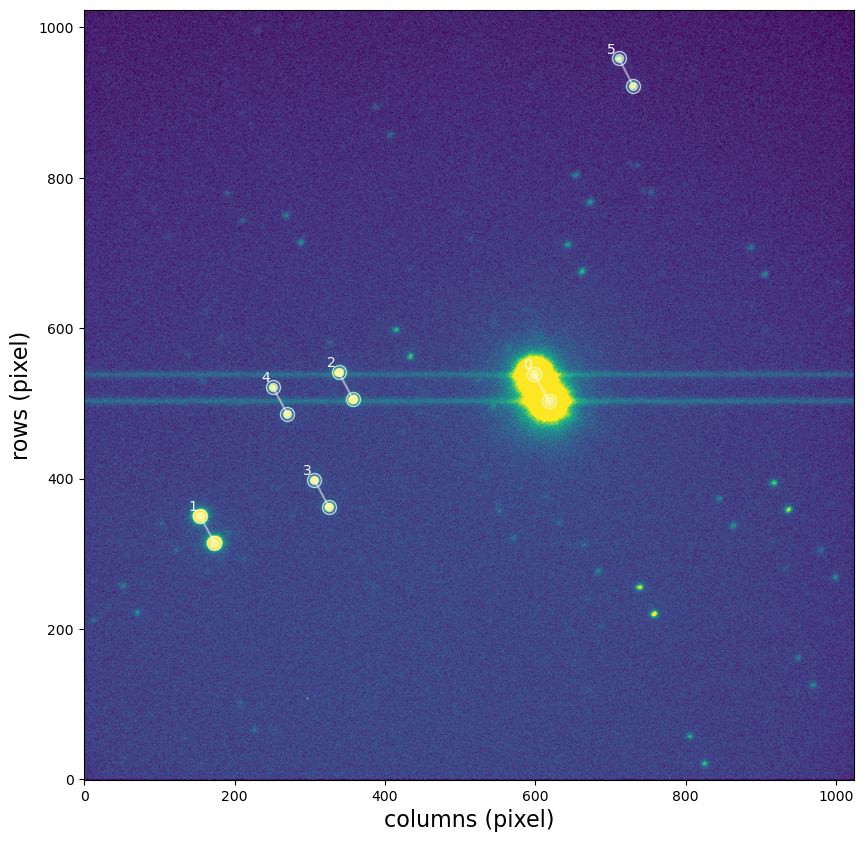

In [6]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [7]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,227.002827,-40.138966,617.593505,503.448307,6.978565,6.978565,-16.508901,0.001550,-14.837433,0.000233,10,0
1,1,227.057782,-40.156779,173.252719,314.905175,6.287410,6.287410,-12.737790,0.022845,-14.833685,0.000122,10,0
2,2,227.035097,-40.138739,357.597617,505.774209,6.590923,6.590923,-10.968792,0.110723,-14.833418,0.000140,10,0
3,3,227.039051,-40.152301,325.298596,362.664360,6.353973,6.353973,-10.558131,0.160913,-14.833522,0.000118,10,0
4,4,227.045922,-40.140597,270.182526,486.148034,6.191177,6.191177,-10.111957,0.241981,-14.833265,0.000136,10,0
5,5,226.989306,-40.099567,729.932825,922.487836,6.749231,6.749231,-9.813099,0.317586,-14.829437,0.000117,10,0


Below we select the source with its index number assigned as the main target to be analyzed. Then we select other stars as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

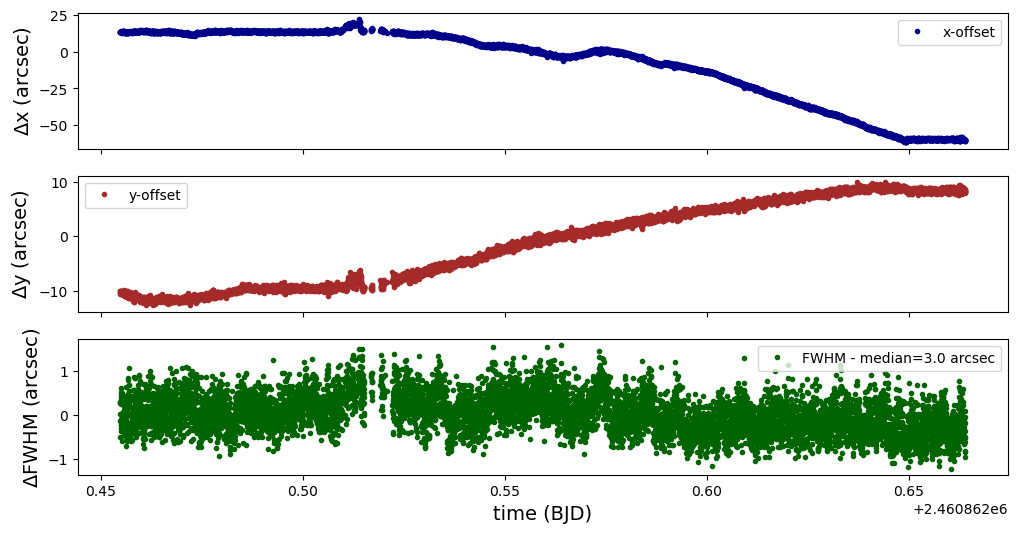

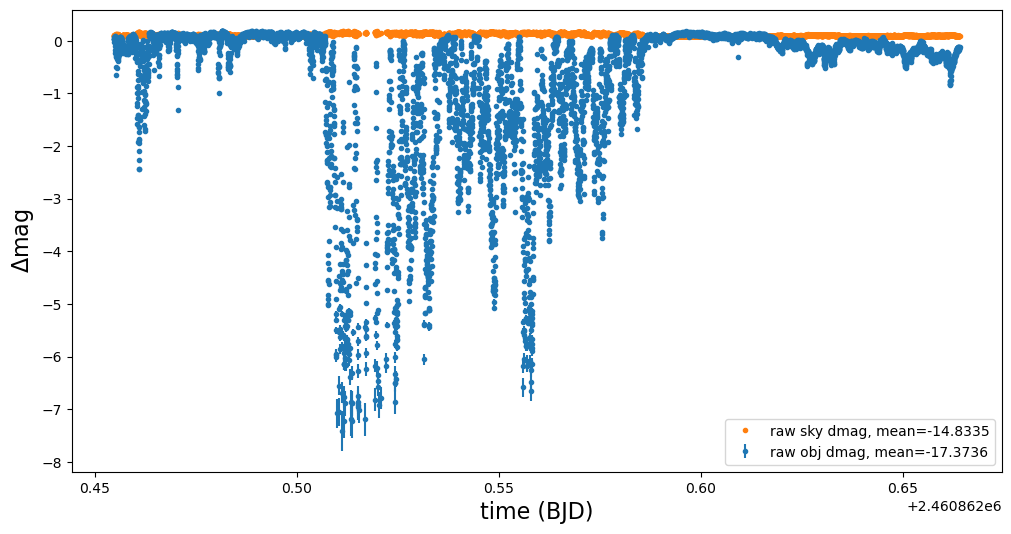

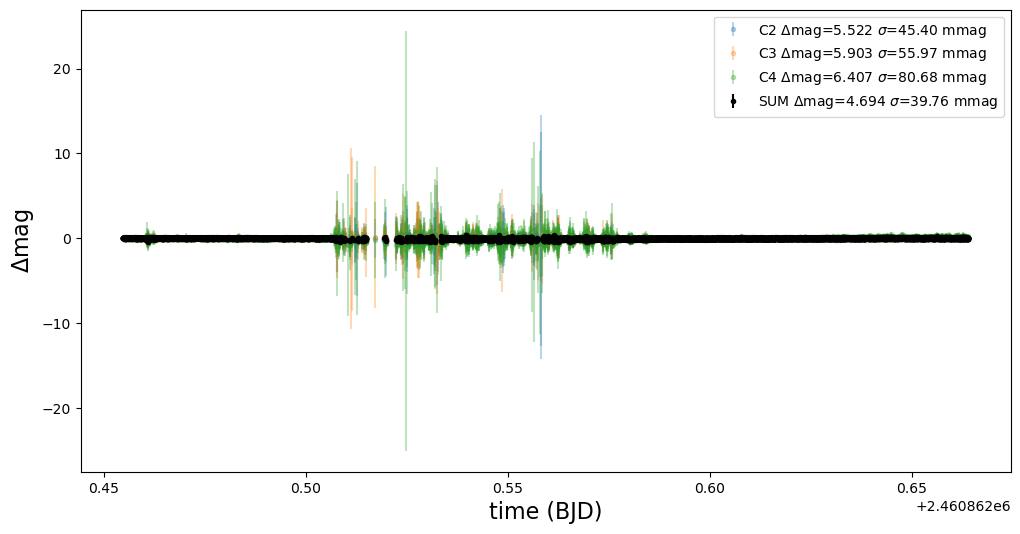

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
2460862.4547876753 608.1237063563137 ...   0.05962516631532022
2460862.4548023744 608.3737063563137 ...   0.04047862026116267
 2460862.454836515 608.8737063563137 ...  0.039057608455581594
 2460862.454851214 608.8737063563137 ...  0.021473875468932313
2460862.4548841272 609.1237063563137 ...   0.03321370825197878
2460862.4548988263 608.8737063563137 ...  0.046363184819584013
2460862.4549314273 609.6237063563137 ... 0.0006449613629539996
               ...               ... ...                   ...
   2460862.6638815 388.6237063563137 ...  0.024199370516838847
 2460862.663915455 388.1237063563137 ... -0.024096394038397584
 2460862.663930154 388.3737063563137 ...  0.011488383113378298
 2460862.663966783 388.8737063563137 ...  0.024874714379222063
 2460862.663981481 386.6237063563137 ... -0.023329008961758824
 2460862.664012844 387.6237063563137 ... -0.01407825927

In [8]:
catalog = 'CATALOG_PHOT_AP010'
target=0
comps=[2,3,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   50409   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU  67258   6R x 33623C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE8394,EFE8394,FO8395,EFO8395,FE8395,EFE8395,FO8396,EFO8396,FE8396,EFE8396
0,2.0,10.0,0.0,227.002827,-40.138966,598.653908,538.746757,617.593505,503.448307,6.278734,...,4.716779e+06,6157.690245,3.897879e+06,5701.065691,4.674274e+06,6136.165329,4.006869e+06,5766.103923,4.799285e+06,6205.686506
1,2.0,10.0,1.0,227.057782,-40.156779,153.965023,350.416400,173.252719,314.905175,6.226652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,10.0,2.0,227.035097,-40.138739,338.462309,541.140934,357.597617,505.774209,6.298732,...,2.949639e+04,2558.513376,2.525931e+04,2552.025655,3.026704e+04,2558.858276,2.470525e+04,2553.249684,2.979644e+04,2559.758269
3,2.0,10.0,3.0,227.039051,-40.152301,306.151580,398.036186,325.298596,362.664360,6.225596,...,2.109725e+04,2548.432907,1.675091e+04,2541.338179,2.013528e+04,2541.863895,1.570765e+04,2540.618030,1.850256e+04,2545.887232
4,2.0,10.0,4.0,227.045922,-40.140597,250.882339,521.580157,270.182526,486.148034,6.500415,...,1.176712e+04,2536.151202,1.014030e+04,2534.392362,1.257167e+04,2538.429080,8.516056e+03,2530.512687,1.082396e+04,2535.923181
5,2.0,10.0,5.0,226.989306,-40.099567,711.055337,958.759069,729.932825,922.487836,6.994463,...,1.126904e+04,2532.068488,9.361605e+03,2508.423377,1.085330e+04,2527.516169,8.776473e+03,2519.910562,1.131470e+04,2531.293899


Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE8394', 'EFE8394', 'FO8395', 'EFO8395', 'FE8395', 'EFE8395', 'FO8396',
       'EFO8396', 'FE8396', 'EFE8396'],
      dtype='object', length=33623)

Finally, we can select the source of interest and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-10-10 15:33:34,924 astropop - INFO - Normalization disabled.  [__init__]


2025-10-10 15:33:34,924 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-10-10 15:33:35,277 root - INFO - Source index: i=0   [pipeline_lib]


2025-10-10 15:33:35,277 | INFO | Source index: i=0 


2025-10-10 15:33:35,278 root - INFO - Source RA=227.00282722563108 Dec=-40.13896638471195 mag=-27.09509+-0.00002  [pipeline_lib]


2025-10-10 15:33:35,278 | INFO | Source RA=227.00282722563108 Dec=-40.13896638471195 mag=-27.09509+-0.00002


2025-10-10 15:33:35,278 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-10-10 15:33:35,278 | INFO | Best aperture radius: 20.0 pixels


2025-10-10 15:33:35,279 root - INFO - Polarization in Q: -0.00450+-0.00006  [pipeline_lib]


2025-10-10 15:33:35,279 | INFO | Polarization in Q: -0.00450+-0.00006


2025-10-10 15:33:35,279 root - INFO - Polarization in U: -0.0002+-0.0001  [pipeline_lib]


2025-10-10 15:33:35,279 | INFO | Polarization in U: -0.0002+-0.0001


2025-10-10 15:33:35,280 root - INFO - Polarization in V: 0.00002+-0.00005  [pipeline_lib]


2025-10-10 15:33:35,280 | INFO | Polarization in V: 0.00002+-0.00005


2025-10-10 15:33:35,280 root - INFO - Total linear polarization p: 0.00450+-0.00006  [pipeline_lib]


2025-10-10 15:33:35,280 | INFO | Total linear polarization p: 0.00450+-0.00006


2025-10-10 15:33:35,281 root - INFO - Angle of polarization theta: 91.0+-0.4 deg  [pipeline_lib]


2025-10-10 15:33:35,281 | INFO | Angle of polarization theta: 91.0+-0.4 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-10-10 15:33:35,282 root - INFO - Free constant k: 0.8382643564845073+-0.0  [pipeline_lib]


2025-10-10 15:33:35,282 | INFO | Free constant k: 0.8382643564845073+-0.0


2025-10-10 15:33:35,283 root - INFO - Zero of polarization: 30.2+-0.0  [pipeline_lib]


2025-10-10 15:33:35,283 | INFO | Zero of polarization: 30.2+-0.0


2025-10-10 15:33:35,284 root - INFO - RMS of zi residuals: 0.01273236381538471  [pipeline_lib]


2025-10-10 15:33:35,284 | INFO | RMS of zi residuals: 0.01273236381538471


2025-10-10 15:33:35,284 root - INFO - Reduced chi-square (n=8391.0, DOF=8388.0): 6.44  [pipeline_lib]


2025-10-10 15:33:35,284 | INFO | Reduced chi-square (n=8391.0, DOF=8388.0): 6.44


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-10-10 15:33:35,616 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:33:35,616 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-10 15:33:35,622 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:33:35,622 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-10 15:33:35,846 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:33:35,846 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-10 15:33:35,852 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:33:35,852 | INFO | Substituting symbol \perp from STIXGeneral


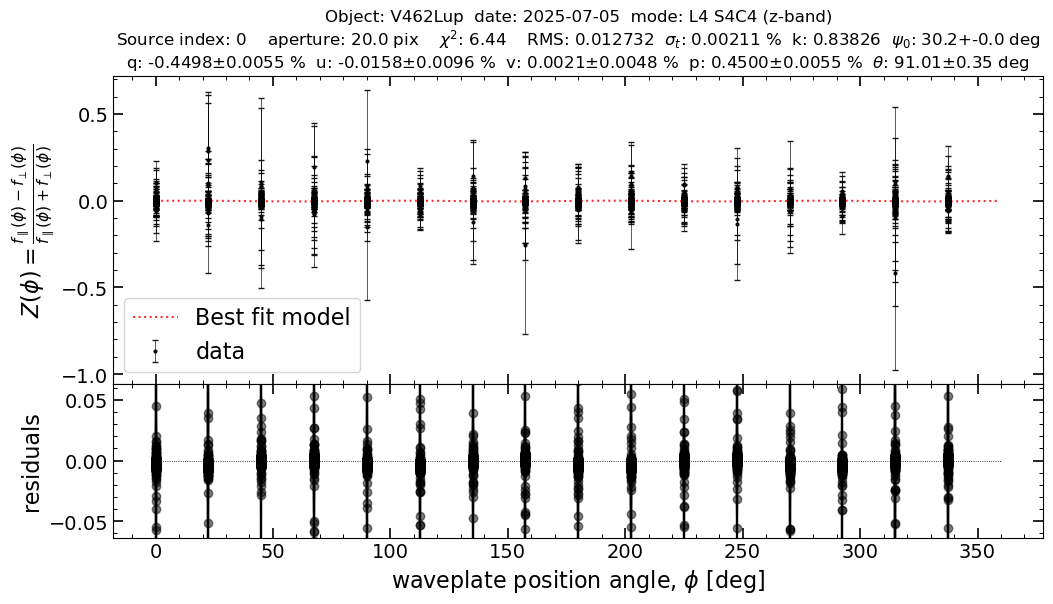

In [12]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [13]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs4/20250705_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
SOURCE_INDEX : 0
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 8397
MAG : -27.09509+-0.00002
RA : 227.00282722563108
DEC : -40.13896638471195
FWHM : 6.278733500727998
X1 : 598.6539078484427
Y1 : 538.7467565641631
X2 : 617.5935048641846
Y2 : 503.4483067944341
WAVEPLATE_ANGLES : [ 0.   0.  22.5 ...  0.  22.5 22.5]
ZI : [-0.004+-0.001, -0.004+-0.001, -0.004+-0.001, ..., -0.002+-0.001,
 -0.002+-0.001, -0.002+-0.001]
FO : [4809000+-8000, 4973000+-8000, 5020000+-8000, ..., 4173000+-7000,
 4137000+-7000, 4239000+-7000]
FE : [5783000+-8000, 5978000+-8000, 6041000+-8000, ..., 5000000+-8000,
 4954000+-8000, 5078000+-8000]
OBSERVED_MODEL : [-0.00118366 -0.00118366 -0.00029685 ... -0.00118366 -0.00029685
 -0.00029685]
Q : -0.00450+-0.00006
U : -0.0002+-0.0001
V : 0.00002+-0.00005
P : 0.00450+-0.00006
THETA : 91.0+-0.4 

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [14]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.450+-0.006 %  Angle of polarization: 91.0+-0.4 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [15]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [16]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

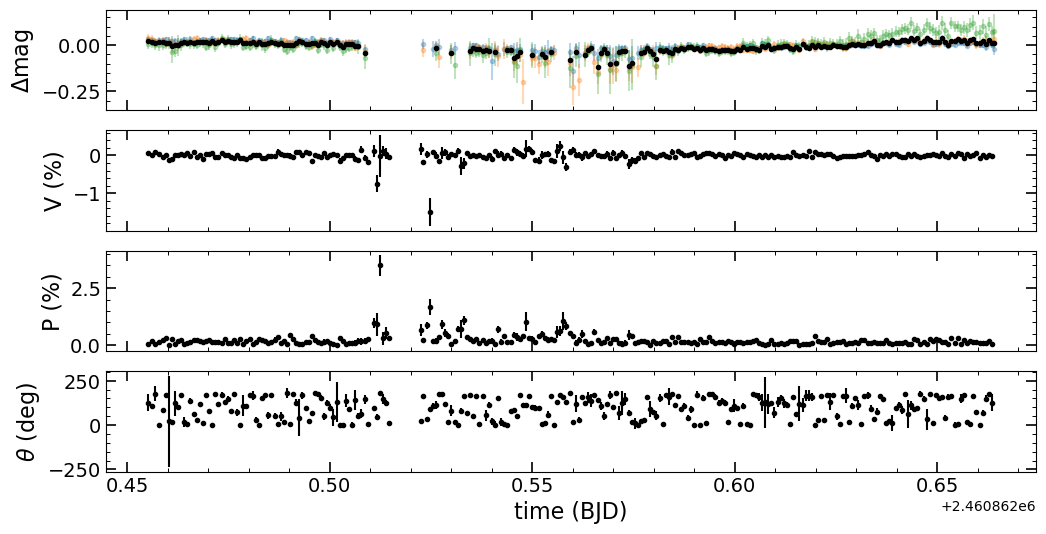

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.030611527665389993,0.01314029208614373,0.04087015387610471,0.018831747220806164,0.00889623909267101,0.029086568374745606,2460862.4551567654,598.6539078484427,538.7467565641631,617.5935048641846,503.4483067944341,6.317642519958128,-21.127544512890864,0.0001846312844317366,-16.403625973225424,0.03705709342599188,0.02362032091146915,0.00044227070124555065,0.0007160067427279339,126.48962979207349,46.301490884085375
0.025482940012092392,0.013013820507355252,0.03468049918291349,0.018627340466155173,0.011291112942698689,0.02900028172912823,2460862.4560100874,600.1539078484427,537.9967565641631,619.0935048641846,502.6983067944341,6.261950818145876,-21.132316455481867,0.00018410643914589767,-16.412301055341803,0.036840901072934217,0.01971718138609191,0.001624896545239347,0.00047557446281348717,106.96107410237246,8.370643458080739
0.02144952158227742,0.012178141283508526,0.02239438766452473,0.01729184573425382,0.0023858921745123496,0.027000065863262687,2460862.456782084,597.9039078484427,537.7467565641631,616.8435048641846,502.4483067944341,6.917703080992254,-21.196058402608735,0.0001777215084631708,-16.483776464654078,0.034296120128013585,0.011983719200685528,0.00035618652939953916,0.0005320337255920838,176.64409028388147,42.719651912679225
0.02742053635004371,0.013447518514288517,0.024777293643916565,0.019046936455744973,-0.0011540741469211468,0.0295898742927216,2460862.4577245093,599.9039078484427,537.7467565641631,618.8435048641846,502.4483067944341,6.1244436393634345,-21.128069896315868,0.00018545128716532507,-16.412974016035477,0.03767066533339506,0.014797661526419148,0.0014921322613835513,0.00040491824873591976,0.9267940758899768,7.761149740914627
0.027686596968742982,0.011232187175521331,0.026985881942765744,0.01591721382329537,0.0002519130739475628,0.02469558478251215,2460862.4586619576,598.4039078484427,536.2467565641631,617.3435048641846,500.9483067944341,6.281741117354607,-21.28784044588207,0.00016905889220894787,-16.571606243906047,0.03145323337378197,0.015935983222050254,0.0022703488600318215,0.0004930513540818925,85.44881447559622,6.211058121941877
0.031903876827739985,0.01142629810950083,0.005194118290795302,0.015812299690285685,0.004640021967921015,0.02512617668539943,2460862.459428544,599.4039078484427,535.2467565641631,618.3435048641846,499.9483067944341,6.584306356130998,-21.273615997752927,0.00017040001369278033,-16.561675511102088,0.031809224390332146,0.011642267896867509,0.003277948533008856,0.000642860834042537,166.73700623832408,5.608940978929911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.006383719283861389,0.014697600872060646,-0.0010512311210355563,0.020739290888361652,0.06696267991587668,0.035106546655055755,2460862.6597135626,381.4039078484427,595.4967565641631,400.34350486418464,560.1983067944341,5.1998373602368115,-20.974699858618347,0.00020045983311518914,-16.264153141119195,0.04334151270498074,0.010248498745180967,0.0013565947065437073,0.0005036032729503032,72.29178319658843,10.617064578612691
7.81367910400732e-05,0.015606552821429335,0.009635571530267839,0.02236999152639233,0.069314474478821,0.037589548929509026,2460862.660482699,381.4039078484427,595.2467565641631,400.34350486418464,559.9483067944341,5.071405539205227,-20.903964191003254,0.00020855494352051992,-16.19239899500259,0.04644162696428153,0.011266977246691567,0.0009662427210619341,0.0003672984524470237,2.6593622100265066,10.871735963443856


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[2,3,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)